<p style="text-align:center; font-size: 26px;">
  <strong>DETECCIÓN DE FRAUDE CON TARJETAS DE CRÉDITO</strong><br>
  Bootcamp de Ciencia de Datos - Proyecto final<br>
  <em>Jonathan Higueros Garrido</em><br>
  <small>Guatemala, 10 de enero de 2025</small>
</p>

Para este proyecto se utilizó un dataset de Transacciones de tarjetas de crédito anonimizadas y etiquetadas como fraudulentas o legítimas. El conjunto de datos contiene 284,807 transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas de crédito europeos.

La fuente de los datos es: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# Objetivos

**1 Detección Temprana de Transacciones Fraudulentas**
Identificar transacciones fraudulentas lo antes posible para mitigar pérdidas económicas tanto para las instituciones financieras como para los clientes. Una detección temprana permite bloquear transacciones antes de que se consumen y proteger los fondos de los usuarios.

**2 Analizar Patrones de Fraude**
Comprender los patrones comunes en las transacciones fraudulentas, como montos inusuales o tiempos de transacción atípicos. Este análisis puede ser útil para desarrollar reglas adicionales y mejorar los sistemas de prevención en el futuro.

**3 Optimizar los Costos Operativos**
Reducir el impacto económico del fraude mediante la detección eficiente de transacciones sospechosas. Minimizar el costo asociado al análisis manual de transacciones sospechosas al automatizar el proceso.

**4 Garantizar la Privacidad y Seguridad de los Datos**
Cumplir con normativas de protección de datos, asegurando que el análisis y almacenamiento de datos sensibles sea seguro. Los datos de las transacciones suelen contener información confidencial, y su manejo inadecuado podría generar riesgos legales y reputacionales.


# Preguntas planteadas durante el desarrollo del proyecto

Las preguntas clave en la elaboración del proyecto de Detección de Fraude con Tarjetas de Crédito fueron:

**1 ¿Qué características en el dataset están más asociadas al fraude?**
- Identificar las variables que son indicadores más fuertes de transacciones fraudulentas.

**2 ¿Cómo se puede manejar el desbalance de datos entre transacciones legítimas y fraudulentas?**
- Las transacciones fraudulentas representan una pequeña proporción, lo que puede afectar el entrenamiento del modelo.

**3 ¿Qué técnicas y algoritmos son más adecuados para detectar fraudes?**
- Determinar qué métodos ofrecen el mejor equilibrio entre precisión y rendimiento.

**4 ¿Cuáles son los patrones más comunes en las transacciones fraudulentas?**
- Evaluar si existen montos u horarios recurrentes en las transacciones fraudulentas.

**5 ¿Cómo podemos minimizar los falsos positivos y falsos negativos?**
- Diseñar un modelo que identifique fraudes sin clasificar erróneamente las transacciones legítimas.

# Preparación del entorno de trabajo

In [5]:
import pandas as pd                      # Para manipulación de datos.
import numpy as np                       # Para operaciones numéricas.
import matplotlib.pyplot as plt          # Para visualización.
import seaborn as sns                    # Para visualización.

# Cargar los datos en un dataframe de pandas

In [7]:
# Cargar el conjunto de datos
datos = pd.read_csv('G:\Escritorio\Proyecto\creditcard.csv')

# Mostrar para entender la estructura
datos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Características del dataset:

- **Variables transformadas (V1...V28):** Las características han sido transformadas utilizando Análisis de Componentes Principales (PCA) para mantener la confidencialidad de la información. Las columnas se denominan V1, V2, hasta V28.

- **Tiempo (Time):** La columna Time contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.

- **Importe (Amount):** La columna Amount es el monto de la transacción.

- **Clase (Class):** La columna Class es la variable objetivo, donde un valor de 1 indica una transacción fraudulenta y 0 indica una transacción legítima.

# Exploración inicial

In [83]:
# Mostrar las primeras filas
print(datos.head())

# Información general
print(datos.info())

# Número de filas y columnas
print(datos.shape)

# Datos nulos
print(datos.isnull())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [11]:
print(datos.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [123]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/a8/e2/91e8ec48c5a9ba759847d74bb69475d22d79922f686e5252d0eb16e5bb85/ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://files.pythonhosted.org/packages/95/e3/250ce99ed761389028543fcb876176ba619f6bf387d6cce3bab736bd92cc/phik-0.12.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for multimethod<2,>=1.4 from https://files.pythonhosted.org/packages/af/98/cff14d53a2f2f67d7fe8a4e235a383ee71aba6a1da12aeea24b325d0c72a/multimethod-1.12-py3-none-any.whl.metadata
  Obtaining depen

In [125]:
from ydata_profiling import ProfileReport

In [127]:
profile = ProfileReport(datos, title="Credit Card Profiling Report")

In [129]:
profile.to_file("CreditCard_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Análisis exploratorio de datos (EDA)

## Distribución de la variable objetivo
- Class: Variable objetivo
- Analizar la proporción de transacciones fraudulentas y no fraudulentas.
- Class 1 indica una transacción fraudulenta
- Class 0 indica una transacción legítima

In [13]:
# Conteo de transacciones fraudulentas y legítimas
class_counts = datos['Class'].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

Las transacciones fraudulentas son una minoría (0.173%), esto significa que los datos están desbalanceados. Si bien con los datos numéricos es bastante claro, con la siguiente gráfica quedará mejor ejemplificado.

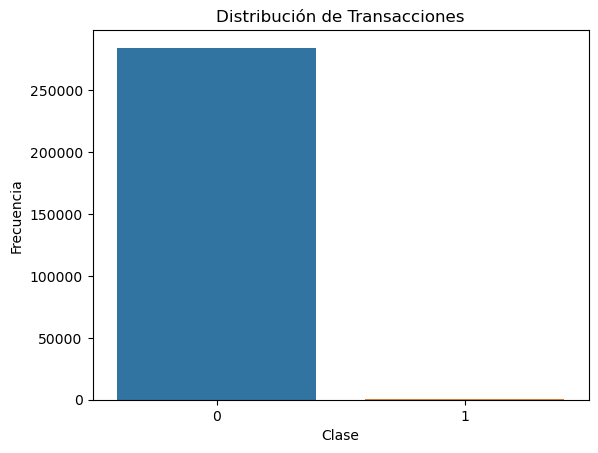

In [15]:
# Gráfica del conteo
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Transacciones')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

## Análisis de las características
- Dado que las características (V1 a V28)han sido transformadas para mantener la confidencialidad de la información y es difícil su interpretación y análisis aún se puede calcular su importancia.
- Se pueden analizar los datos de las columnas Amount y Time.

### Importancia de las características

Al evaluar la importancia de las características presentes en el dataset, se observa que algunas de las variables transformadas muestran cierta relevancia. Sin embargo, debido a que ya han sido modificadas con PCA y a su naturaleza de información clasificada (como datos personales, números de tarjeta, correos electrónicos u otra información sensible), estas variables no contribuyen de manera significativa y no son relevantes para el análisis.

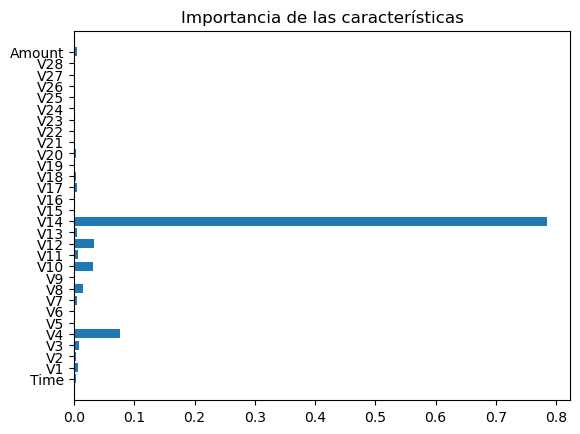

In [105]:
importances = modelo_gb.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, importances)
plt.title('Importancia de las características')
plt.show()

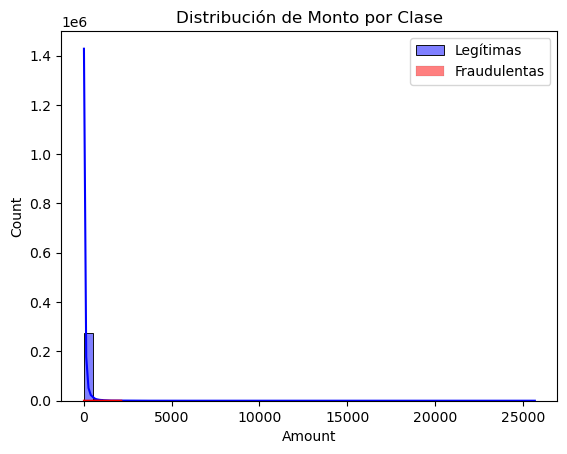

In [29]:
# Histograma de Amount
sns.histplot(datos[datos['Class'] == 0]['Amount'], bins=50, color='blue', label='Legítimas', kde=True)
sns.histplot(datos[datos['Class'] == 1]['Amount'], bins=50, color='red', label='Fraudulentas', kde=True)
plt.legend()
plt.title('Distribución de Monto por Clase')
plt.show()

### ¿Qué podemos observar en el gráfico?

En la gráfica tenemos dos histogramas superpuestos:
- Montos de transacciones no fraudulentas (azul) suelen concentrarse en rangos específicos, como pequeñas o medianas transacciones.
- Montos de transacciones fraudulentas (rojo) podrían mostrar una distribución diferente:
  - Podrían estar más dispersos.
  - Podrían ser más frecuentes en un rango específico de valores.

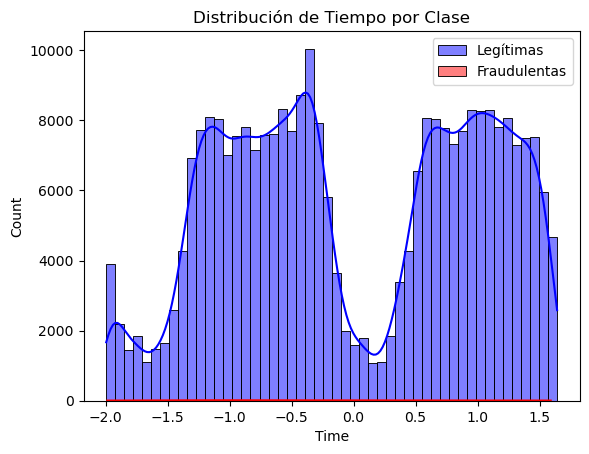

In [108]:
# Histograma de Time
sns.histplot(datos[datos['Class'] == 0]['Time'], bins=50, color='blue', label='Legítimas', kde=True)
sns.histplot(datos[datos['Class'] == 1]['Time'], bins=50, color='red', label='Fraudulentas', kde=True)
plt.legend()
plt.title('Distribución de Tiempo por Clase')
plt.show()

### ¿Qué podemos observar en el gráfico?

El gráfico muestra que las transacciones legítimas (azul) tienen una distribución bimodal con patrones claros en ciertos rangos de tiempo, mientras que las fraudulentas (rojo) son escasas y dispersas. Esto sugiere que el tiempo por sí solo no es suficiente para diferenciar entre transacciones legítimas y fraudulentas, aunque podría ser útil en combinación con otras variables.

### Correlaciones

Las tres variables (Amount, Time y Class) estudiadas son prácticamente independientes entre sí, ya que todas las correlaciones son cercanas a cero. Esto sugiere que:

- El monto de la transacción no está relacionado con la hora en que ocurre
- El monto no influye en si una transacción es fraudulenta o no (Class)
- La hora de la transacción no está relacionada con la probabilidad de fraude

Esto es interesante desde el punto de vista del análisis de fraudes, ya que indica que las transacciones fraudulentas pueden ocurrir en cualquier momento y por cualquier monto.

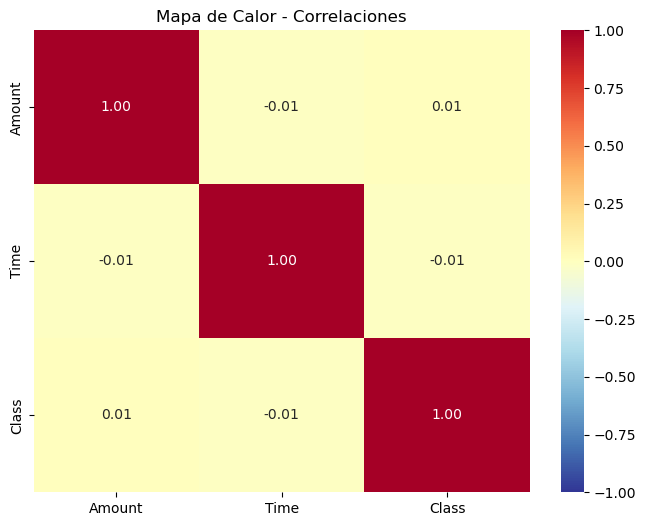

In [139]:
# Calcular la matriz de correlación
correlation_matrix = datos[['Amount', 'Time', 'Class']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,                # Muestra los valores numéricos
            cmap='RdYlBu_r',           # Paleta más suave
            vmin=-1, vmax=1,           # Rango de valores
            center=0,                  # Centro del mapa de calor
            fmt='.2f',                 # Formato de números con 2 decimales
            cbar_kws={'alpha':0.5})    # Hace la barra de color más transparente

# Ajustar la intensidad general
plt.alpha = 0.7

# Añadir título
plt.title('Mapa de Calor - Correlaciones')

# Mostrar el gráfico
plt.show()

## Análisis estadístico de la variable Amount

En la exploración inicial de los datos se obtuvo información estadística del conjunto de datos:

| Estadística | Amount |
|------------|-----------|
| count | 284,807.000000 |
| mean | 88.349619 |
| std | 250.120109 |
| min | 0.000000 |
| 25% | 5.600000 |
| 50% | 22.000000 |
| 75% | 77.165000 |
| max | 25,691.160000 |

Analizando estas estadísticas descriptivas, puedo inferir varios aspectos importantes:

**1. Distribución muy asimétrica (sesgada a la derecha):**
- La media (88.35) es significativamente mayor que la mediana (22.00)
- Hay una gran diferencia entre el máximo (25,691.16) y el 75% percentil (77.165)
- Esta asimetría sugiere que hay algunos valores muy altos que están "jalando" la media hacia arriba

**2. Alta dispersión de los datos:**
- La desviación estándar (250.12) es casi 3 veces mayor que la media (88.35)
- El rango es muy amplio: desde 0 hasta 25,691.16
- Esto indica que hay una gran variabilidad en los valores

**3. Concentración de valores bajos:**
- El 50% de los datos está por debajo de 22.00
- El 75% de los datos está por debajo de 77.165
- Esto sugiere que la mayoría de los valores son relativamente bajos

**4. Posibles outliers:**
- La gran diferencia entre el máximo (25,691.16) y el 75% percentil (77.165) sugiere la presencia de valores atípicos
- Estos outliers podrían ser transacciones inusuales o potencialmente fraudulentas

**5. Tamaño de muestra:**
- Con 284,807 observaciones, es un conjunto de datos bastante grande
- Esto da robustez a las conclusiones estadísticas

**6. Dado el contexto de transacciones con tarjetas de crédito, estos patrones tienen sentido:**
- La mayoría de las transacciones son de montos pequeños (compras cotidianas)
- Hay algunas transacciones de montos muy altos (compras excepcionales)
- La presencia de valores atípicos podría indicar transacciones fraudulentas o compras de lujo

# Preprocesamiento de Datos

## Estandarización
Para mejorar el rendimiento del modelo se estandarizarán las variables Amount y Time.

In [31]:
from sklearn.preprocessing import StandardScaler

# Estandarizar Amount y Time
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1, 1))
datos['Time'] = StandardScaler().fit_transform(datos['Time'].values.reshape(-1, 1))

## División de datos
A continuación se separarán las características (X) y la variable objetivo (y).

In [33]:
X = datos.drop('Class', axis=1)   # Contendrá las variables predictoras, es decir, todas las columnas excepto la columna Class.
y = datos['Class']   # Contendrá la variable objetivo, que en este caso es Class.

## Balanceo de clases
Dado que las transacciones fraudulentas son una minoría, es crucial abordar el desbalanceo. Para ello se utilizará la técnica de resampling SMOTE (Synthetic Minority Over-sampling Technique), que es una técnica de remuestreo utilizada para abordar el problema de desbalance de clases en conjuntos de datos.

Según el modelo de lenguaje Claude (claude.ai), estás son las características de la técnica SMOTE:

**1. Funciona así:**
- Toma muestras de la clase minoritaria
- Crea ejemplos sintéticos (artificiales) similares a los existentes
- Genera nuevos datos interpolando entre ejemplos cercanos de la clase minoritaria

**2. Sus principales características son:**
- Evita el sobreajuste que puede ocurrir con el sobremuestreo simple (duplicar casos)
- Crea ejemplos sintéticos en lugar de copiar los existentes
- Utiliza el algoritmo de k vecinos más cercanos para generar nuevas instancias
- Ayuda a mejorar la detección de la clase minoritaria sin perder generalización

**3. Es especialmente útil en casos como:**
- Detección de fraude (donde hay pocas transacciones fraudulentas)
- Diagnóstico médico (donde los casos positivos son menos frecuentes)
- Detección de fallos (donde los fallos son eventos raros)

In [26]:
pip install --upgrade scikit-learn imbalanced-learn   # Fue necesario actualizar scikit-learn e imblearn para que fueran compatibles.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [35]:
from imblearn.over_sampling import SMOTE   # Para técnicas de balanceo de datos.

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# División del conjunto de datos
Se dividirán los datos en dos conjuntos, datos de entrenamiento y datos de prueba.

Se dividirán los datos que ya han sido balanceados utilizando la técnica SMOTE (es decir, X_res y y_res) en cuatro conjuntos:
- X_train: Conjunto de características para entrenar el modelo.
- X_test: Conjunto de características para probar el modelo.
- y_train: Etiquetas de clase (fraude o no fraude) correspondientes al conjunto de entrenamiento.
- y_test: Etiquetas de clase correspondientes al conjunto de prueba.

En este caso, el 20% de los datos (0.2) se destinarán para la evaluación del modelo y el 80% restante se usará para entrenarlo. Esto permite que el modelo se entrene con una gran parte de los datos y se evalúe con una muestra que no haya sido usada en el entrenamiento. 

random_state=42: Este es un parámetro que garantiza que la división de los datos sea reproducible. Si no se establece random_state, se generará una división diferente cada vez que se ejecute el código.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenamiento de modelos
A continuación se entrenarán 4 modelos de clasificación:

## 1 Regresión logística

In [67]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
modelo_lr = LogisticRegression()

#Entrenar el modelo
modelo_lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de test
print(modelo_lr.predict(X_test))

print(modelo_lr.predict_proba(X_test))
print(modelo_lr.score(X_test, y_test))   # Accuracy

[1 1 0 ... 1 1 0]
[[5.99520433e-15 1.00000000e+00]
 [6.81676937e-14 1.00000000e+00]
 [9.34746483e-01 6.52535174e-02]
 ...
 [4.85306153e-01 5.14693847e-01]
 [0.00000000e+00 1.00000000e+00]
 [8.32807011e-01 1.67192989e-01]]
0.9489035049153228


### Evaluación del modelo

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predecir con el modelo entrenado
y_pred = modelo_lr.predict(X_test)

# Evaluar el rendimiento del modelo
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")
print()
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print()
#Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Exactitud del modelo: 0.95

Matriz de confusión:
[[55368  1382]
 [ 4429 52547]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



### Para transacciones legítimas (Class 0)
- Precisión: 0.93. El modelo identificó correctamente el 93% de las predicciones positivas de "Legítimas".
- Recall: 0.98. El modelo identificó el 98% de todas las instancias de "Legítimas".
- F1-Score: 0.95. El balance entre la precisión y el recall es de 0.95 para la Clase 0.
- Support: 56750. Hay 56750 instancias reales de la clase "Legítimas" en el conjunto de datos.

### Para transacciones fraudulentas (Class 1)
- Precisión: 0.97. El modelo identificó correctamente el 97% de las predicciones positivas de "Fraudulentas".
- Recall: 0.92. El modelo identificó el 92% de todas las instancias de "Fraudulentas".
- F1-Score: 0.95. El balance entre precisión y recall es de 0.95 para la Clase 1.
- Support: 56976. Hay 56976 instancias reales de la clase "Fraudulentas" en el conjunto de datos.

### Métricas Generales:
- Exactitud (accuracy): 0.95. El modelo tiene una tasa de aciertos del 95% en total.
- Promedio Macro (macro avg): Promedia la precisión, el recall y el F1-Score sin considerar el soporte. En este caso, es aproximadamente 0.95 para precisión, 0.95 para recall y 0.95 para F1-Score.
- Promedio ponderado (weighted avg): Promedia las métricas ponderadas por el soporte (es decir, el número de instancias de cada clase). En este caso, los resultados ponderados son 0.95 para precisión, 0.95 para recall y 0.95 para F1-Score.

## 2 Bosque aleatorio

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
modelo_rf = RandomForestClassifier()

#Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de test
print(modelo_rf.predict(X_test))

print(modelo_rf.predict_proba(X_test))
print(modelo_rf.score(X_test, y_test))

[1 1 0 ... 1 1 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
0.9999120693596891


### Evaluación del modelo

In [85]:
# Predecir con el modelo entrenado
y_pred = modelo_rf.predict(X_test)

# Evaluar el rendimiento del modelo
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")
print()
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print()
#Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Exactitud del modelo: 1.00

Matriz de confusión:
[[56740    10]
 [    0 56976]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Para transacciones legítimas (Class 0)
- Precisión: 1.0. El modelo identificó correctamente el 100% de las predicciones positivas de "Legítimas".
- Recall: 1.0. El modelo identificó el 100% de todas las instancias de "Legítimas".
- F1-Score: 1.0. El balance entre la precisión y el recall es de 1.0 para la Clase 0.
- Support: 56750. Hay 56750 instancias reales de la clase "Legítimas" en el conjunto de datos.

### Para transacciones fraudulentas (Class 1)
- Precisión: 1.0. El modelo identificó correctamente el 100% de las predicciones positivas de "Fraudulentas".
- Recall: 1.0. El modelo identificó el 100% de todas las instancias de "Fraudulentas".
- F1-Score: 1.0. El balance entre precisión y recall es de 1.0 para la Clase 1.
- Support: 56976. Hay 56976 instancias reales de la clase "Fraudulentas" en el conjunto de datos.

### Métricas Generales:
- Exactitud (accuracy): 1.0. El modelo tiene una tasa de aciertos del 100% en total.
- Promedio Macro (macro avg): Promedia la precisión, el recall y el F1-Score sin considerar el soporte. En este caso, es aproximadamente 1.0 para precisión, 1.0 para recall y 1.0 para F1-Score.
- Promedio ponderado (weighted avg): Promedia las métricas ponderadas por el soporte (es decir, el número de instancias de cada clase). En este caso, los resultados ponderados son 1.0 para precisión, 1.0 para recall y 1.0 para F1-Score.

## 3 K-Nearest Neighbors (KNN)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)

#Entrenar el modelo
modelo_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de test
print(modelo_knn.predict(X_test))

print(modelo_knn.predict_proba(X_test))
print(modelo_knn.score(X_test, y_test))

[1 1 0 ... 1 1 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
0.9989008669961135


In [89]:
# Predecir con el modelo entrenado
y_pred = modelo_knn.predict(X_test)

# Evaluar el rendimiento del modelo
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")
print()
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print()
#Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Exactitud del modelo: 1.00

Matriz de confusión:
[[56625   125]
 [    0 56976]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Para transacciones legítimas (Class 0)
- Precisión: 1.0. El modelo identificó correctamente el 100% de las predicciones positivas de "Legítimas".
- Recall: 1.0. El modelo identificó el 100% de todas las instancias de "Legítimas".
- F1-Score: 1.0. El balance entre la precisión y el recall es de 1.0 para la Clase 0.
- Support: 56750. Hay 56750 instancias reales de la clase "Legítimas" en el conjunto de datos.

### Para transacciones fraudulentas (Class 1)
- Precisión: 1.0. El modelo identificó correctamente el 100% de las predicciones positivas de "Fraudulentas".
- Recall: 1.0. El modelo identificó el 100% de todas las instancias de "Fraudulentas".
- F1-Score: 1.0. El balance entre precisión y recall es de 1.0 para la Clase 1.
- Support: 56976. Hay 56976 instancias reales de la clase "Fraudulentas" en el conjunto de datos.

### Métricas Generales:
- Exactitud (accuracy): 1.0. El modelo tiene una tasa de aciertos del 100% en total.
- Promedio Macro (macro avg): Promedia la precisión, el recall y el F1-Score sin considerar el soporte. En este caso, es aproximadamente 1.0 para precisión, 1.0 para recall y 1.0 para F1-Score.
- Promedio ponderado (weighted avg): Promedia las métricas ponderadas por el soporte (es decir, el número de instancias de cada clase). En este caso, los resultados ponderados son 1.0 para precisión, 1.0 para recall y 1.0 para F1-Score.

## 4 Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el modelo
modelo_gb = GradientBoostingClassifier()

#Entrenar el modelo
modelo_gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de test
print(modelo_gb.predict(X_test))

print(modelo_gb.predict_proba(X_test))
print(modelo_gb.score(X_test, y_test))

[1 1 0 ... 1 1 0]
[[0.00452951 0.99547049]
 [0.00470366 0.99529634]
 [0.97937778 0.02062222]
 ...
 [0.1934076  0.8065924 ]
 [0.00412676 0.99587324]
 [0.96035402 0.03964598]]
0.9781492358827357


In [93]:
# Predecir con el modelo entrenado
y_pred = modelo_gb.predict(X_test)

# Evaluar el rendimiento del modelo
# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")
print()
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print()
#Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Exactitud del modelo: 0.98

Matriz de confusión:
[[56026   724]
 [ 1761 55215]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



### Para transacciones legítimas (Class 0)
- Precisión: 0.97. El modelo identificó correctamente el 97% de las predicciones positivas de "Legítimas".
- Recall: 0.99. El modelo identificó el 99% de todas las instancias de "Legítimas".
- F1-Score: 0.98. El balance entre la precisión y el recall es de 0.98 para la Clase 0.
- Support: 56750. Hay 56750 instancias reales de la clase "Legítimas" en el conjunto de datos.

### Para transacciones fraudulentas (Class 1)
- Precisión: 0.99. El modelo identificó correctamente el 99% de las predicciones positivas de "Fraudulentas".
- Recall: 0.97. El modelo identificó el 97% de todas las instancias de "Fraudulentas".
- F1-Score: 0.98. El balance entre precisión y recall es de 0.98 para la Clase 1.
- Support: 56750. Hay 56976 instancias reales de la clase "Fraudulentas" en el conjunto de datos.

### Métricas Generales:
- Exactitud (accuracy): 0.98. El modelo tiene una tasa de aciertos del 98% en total.
- Promedio Macro (macro avg): Promedia la precisión, el recall y el F1-Score sin considerar el soporte. En este caso, es aproximadamente 0.98 para precisión, 0.98 para recall y 0.98 para F1-Score.
- Promedio ponderado (weighted avg): Promedia las métricas ponderadas por el soporte (es decir, el número de instancias de cada clase). En este caso, los resultados ponderados son 0.98 para precisión, 0.98 para recall y 0.98 para F1-Score.

# Comparando los resultados de los modelos

**1 Modelos de sobreajuste:**
Tanto el **Random Forest** como el **KNN** tienen una precisión del 100%, lo que podría ser un indicio de sobreajuste, especialmente si los datos no están suficientemente bien preparados o balanceados.

**2 Modelo más equilibrado:**
El **Gradient Boosting** parece ser el modelo más equilibrado en términos de precisión y recall, y la exactitud del 98% también es bastante buena. Este modelo podría ser más robusto y generalizar mejor a nuevos datos.

**3 Regresión Logística:**

La Regresión Logística tiene una exactitud algo más baja (95%), pero todavía es un buen modelo base. También podría beneficiarse de ajustes de hiperparámetros o el uso de técnicas de regularización.

## ¿Qué se puede hacer?
- **Validación Cruzada:** Realizar una validación cruzada para ver si los modelos con precisión perfecta (RF y KNN) son robustos o si hay problemas de sobreajuste.
- **Ajuste de Hiperparámetros:** Realizar un GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros para el Gradient Boosting y otros modelos.
- **Verificación de rendimiento:** Evaluar el desempeño de los modelos en datos no vistos para comprobar la capacidad de generalización. 

# Desafios

**1 Lidiar con el desbalance de datos**
La alta disparidad entre transacciones legítimas y fraudulentas dificultó el análisis de los datos y el entrenamiento de modelos. Este problema requirió el uso de técnicas como SMOTE. Sin embargo, el balanceo pudo influir en los resultados finales, y en otro escenario, un dataset más grande habría permitido aplicar submuestreo en lugar de sobremuestreo.

**2 Sobrecarga de documentación de librerías**
La cantidad de información disponible en las librerías utilizadas, como scikit-learn y imbalanced-learn, complicó encontrar soluciones específicas para problemas concretos. Esto demandó tiempo adicional en investigación y pruebas.

**3 Evaluación del desempeño de modelos**
Seleccionar las métricas adecuadas para evaluar los modelos fue un punto crítico. Métricas como precisión y recall no siempre reflejan completamente la efectividad de los modelos.

**4 Evaluar apropiadamente las capacidades del modelo**
En ocasiones, se sobreestiman las capacidades de los modelos utilizados. Las evaluaciones tradicionales empleadas en este proyecto no siempre reflejan resultados completamente precisos. Esto genera cuestionamientos sobre la conveniencia de incorporar métodos más robustos, como la validación cruzada (Cross-Validation), para obtener una evaluación más confiable y generalizable del rendimiento del modelo.

# Hallazgos y conclusiones

**1 Baja Frecuencia de las Transacciones Fraudulentas**
Los fraudes son eventos extremadamente poco frecuentes (menos del 0.2% del total), lo que complica su detección. Este desbalance requiere estrategias específicas para entrenar modelos efectivos, como el uso de técnicas de sobremuestreo (SMOTE) o ajustes en las métricas de evaluación.

**2 Patrones Inconsistentes**
Las transacciones fraudulentas no siempre presentan patrones obvios, como montos extremadamente altos. Esto indica que los fraudes pueden ocurrir en cualquier rango de valores, lo que demanda modelos capaces de identificar relaciones complejas.

**3 Distribución Temporal** 
Las transacciones fraudulentas no siguen una tendencia horaria clara, lo que indica que los fraudes pueden ocurrir en cualquier momento.

**4 Frecuencia por Monto**
Algunas transacciones fraudulentas se concentran en montos específicos (bajos o moderados), probablemente para evitar alertas automatizadas.

**5 Seguridad de Datos**
Dado que el dataset contiene información transformada, se garantiza la privacidad. Sin embargo, en entornos reales, el manejo ético de datos sensibles es esencial.

**6 Implicaciones para la Industria**
- Impacto de los Falsos Positivos: Aunque los falsos positivos no generan pérdidas directas, pueden deteriorar la experiencia del cliente al bloquear transacciones legítimas.
- Prevención Proactiva: La implementación de sistemas predictivos permite a las instituciones financieras actuar antes de que se complete una transacción fraudulenta.
- Optimización Operativa: La automatización reduce el tiempo y costo dedicados a revisar manualmente transacciones sospechosas.
- Reputación y Confianza: Proteger a los usuarios de fraudes fortalece la relación cliente-banco.

# Conclusiones técnicas

**1 Importancia de las variables**
Aunque las características V1 a V28 tienen relevancia estadística para los modelos, su falta de interpretabilidad directa limita su utilidad para análisis explicativos. Las variables Amount y Time, aunque menos correlacionadas con el fraude, proporcionan contexto útil para el preprocesamiento y la visualización.

**2 Desbalance de clases**
La técnica SMOTE fue efectiva para balancear el dataset, lo que mejoró significativamente el rendimiento de los modelos, sin embargo, esto pudo afectar al resultado obtenido por los modelos.

**3 Rendimiento del Modelo**
El modelo de Gradient Boosting presentó el mejor balance entre precisión, recall y F1-score, con un desempeño robusto en datos de prueba (98% de exactitud). Random Forest y KNN lograron una precisión perfecta, pero podrían estar sobreajustados, lo que se debe validar con datos no vistos.

**4 Recomendaciones para el Futuro**
Implementar validación cruzada para garantizar que los modelos sean robustos y no dependan de un conjunto de prueba específico. Explorar técnicas de ajuste de hiperparámetros, como Grid Search o Randomized Search, para optimizar aún más el rendimiento del Gradient Boosting y otros modelos. Analizar la posibilidad de incorporar datos adicionales que puedan proporcionar un contexto más rico, como la ubicación geográfica o el tipo de comercio.

# Referencias

* https://claude.ai/new
* https://docs.profiling.ydata.ai/latest/
* https://seaborn.pydata.org/tutorial.html
* https://numpy.org/devdocs/user/index.html
* https://matplotlib.org/stable/users/index.html
* https://scikit-learn.org/stable/user_guide.html
* https://scikit-learn.org/1.5/modules/neighbors.html
* https://pandas.pydata.org/docs/user_guide/index.html
* https://www.youtube.com/watch?v=Qnth2VXopLg&t=192s
* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data
* https://docs.profiling.ydata.ai/latest/getting-started/installation/
* https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html#
* https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# Libros consultados

- Data Science Handbook: A practical approach - Kolla Bhanu Prakash
- Ciencia de datos desde cero: Principios básicos con Python (Segunda Edición) - Joel Grus
- Estadística - Serie Schaum (Sexta Edición) - Murray R. Spiegel, PhD & Larry J. Stephens, PhD
- Python para análisis de datos: Manipulación de datos con pandas, NumPy y Jupyter (Tercera Edición) - Wes McKinney
- Inteligencia de negocios y analítica de datos: Una visión global de Business Intelligence & Analytics - Luis Joyanes Aguilar